# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# paths of dataset

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

# load training set

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

# load validation set

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)

# load test set

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train_orig , y_train = train['features'], train['labels']
X_valid_orig , y_valid = valid['features'], valid['labels']
X_test_orig  , y_test = test['features'], test['labels']

---

# Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image.   <br> **Note : THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


## 1 . Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# Number of training examples

n_train = len(X_train_orig)

# Number of validation examples

n_validation = len(X_valid_orig)

# Number of testing examples.

n_test = len(X_test_orig)

# What's the shape of an traffic sign image?

image_shape = X_train_orig.shape[1:]

# How many unique classes/labels there are in the dataset.

n_classes = np.max(y_train)+1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## 2 .  Names of traffic signs
The signnames.csv file contains id -> name mappings for each class/label id

In [21]:
import pandas as pd

# load signnames.csv file as pandas data frame

df = pd.read_csv('./signnames.csv')

# get number of classes

n_classes = len(df.values)

print('Number of classes = ' , n_classes)

print('\n===============Classes Ids and traffic sign names==============\n')

# print the data frame

print(df)

# store the traffic sign names in sign_names numpy array

sign_names = df['SignName'].values

Number of classes =  43

===============Classes Ids and traffic sign names==============

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                 

## 3 . Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

In [5]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### I. Plotting the distribution of traffic signs in the different sets 

It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

* ## Training set

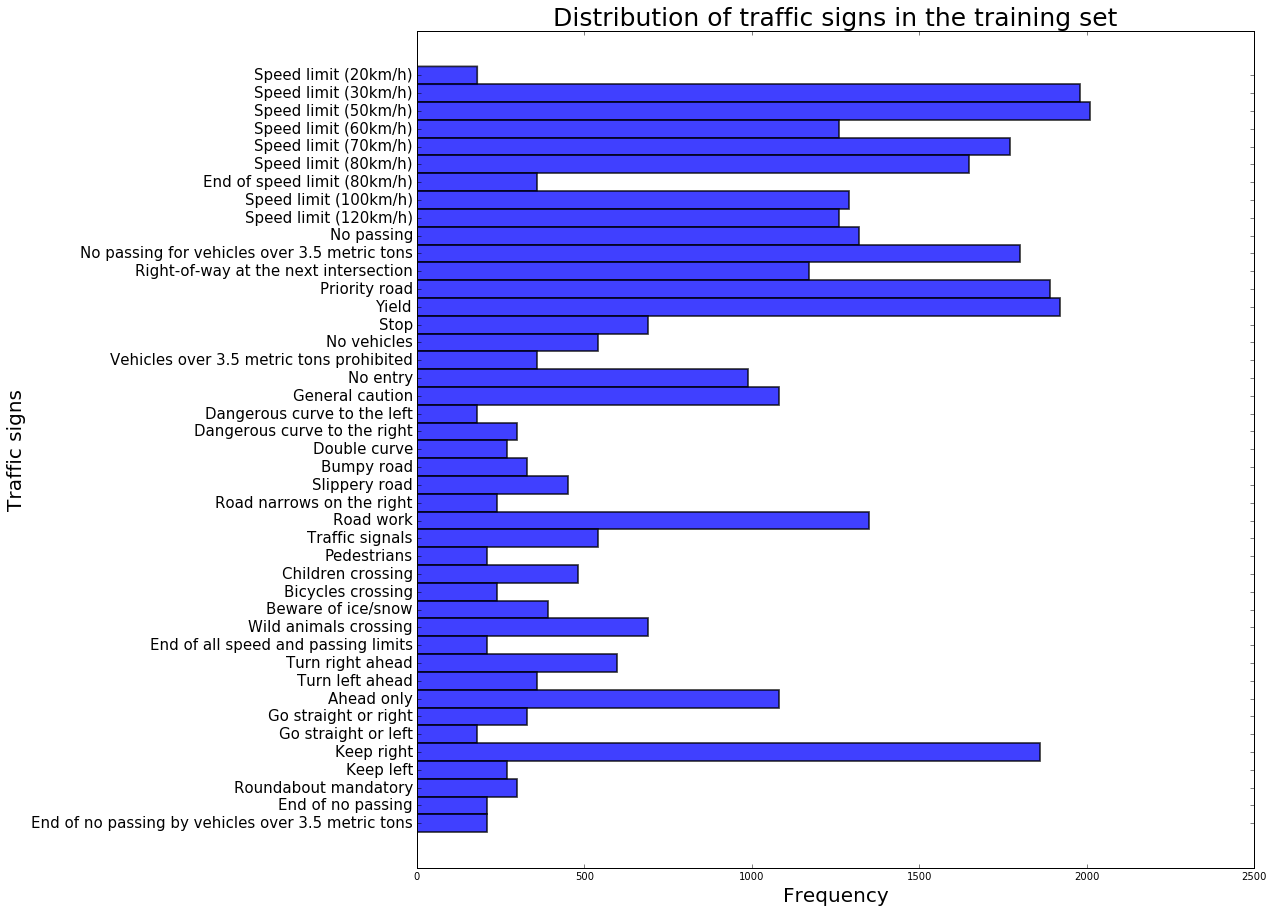

In [6]:
# plot a histogram of classes in the training set .

plt.figure(figsize=(15,15))

# divide the range of values into bins 

bins = np.arange(n_classes+1) - 0.5

# plot the histogram which mapps the bins into counts

plt.hist( y_train , bins , linewidth = 1.75 , alpha = 0.75 , orientation = 'horizontal')

plt.xlabel('Frequency' , fontsize=20 )
plt.ylabel('Traffic signs' , fontsize=20 )
plt.yticks( np.arange(n_classes) , sign_names , fontsize=15)
plt.ylim( np.min(bins) - 2 , np.max(bins) + 2 )
# reverse y-axis
plt.ylim(plt.ylim()[::-1])
plt.title('Distribution of traffic signs in the training set' , fontsize=25)
plt.savefig('./outputs/Distribution_of_traffic_signs_in_the_training_set.png')
plt.show()

* ## Validation set

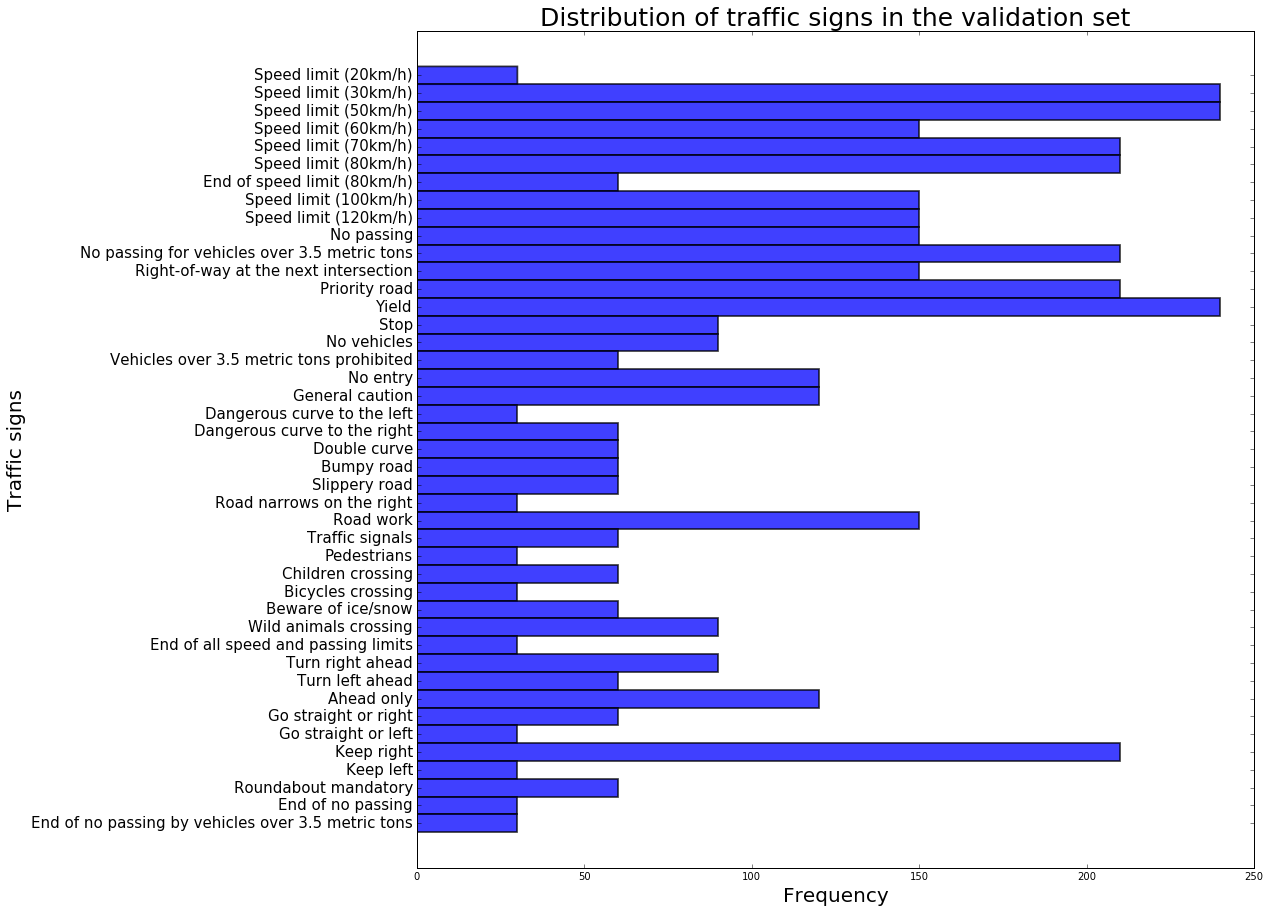

In [7]:
# plot a histogram of classes in the validation set .

plt.figure(figsize=(15,15))

# divide the range of values into bins 

bins = np.arange(n_classes+1) - 0.5

# plot the histogram which mapps the bins into counts

plt.hist( y_valid , bins , linewidth = 1.75 , alpha = 0.75 , orientation = 'horizontal')

plt.xlabel('Frequency' , fontsize=20 )
plt.ylabel('Traffic signs' , fontsize=20 )
plt.yticks( np.arange(n_classes) , sign_names , fontsize=15)
plt.ylim( np.min(bins) - 2 , np.max(bins) + 2 )
# reverse y-axis
plt.ylim(plt.ylim()[::-1])
plt.title('Distribution of traffic signs in the validation set' , fontsize=25)
plt.savefig('./outputs/Distribution_of_traffic_signs_in_the_validation_set.png')
plt.show()

* ## Test set

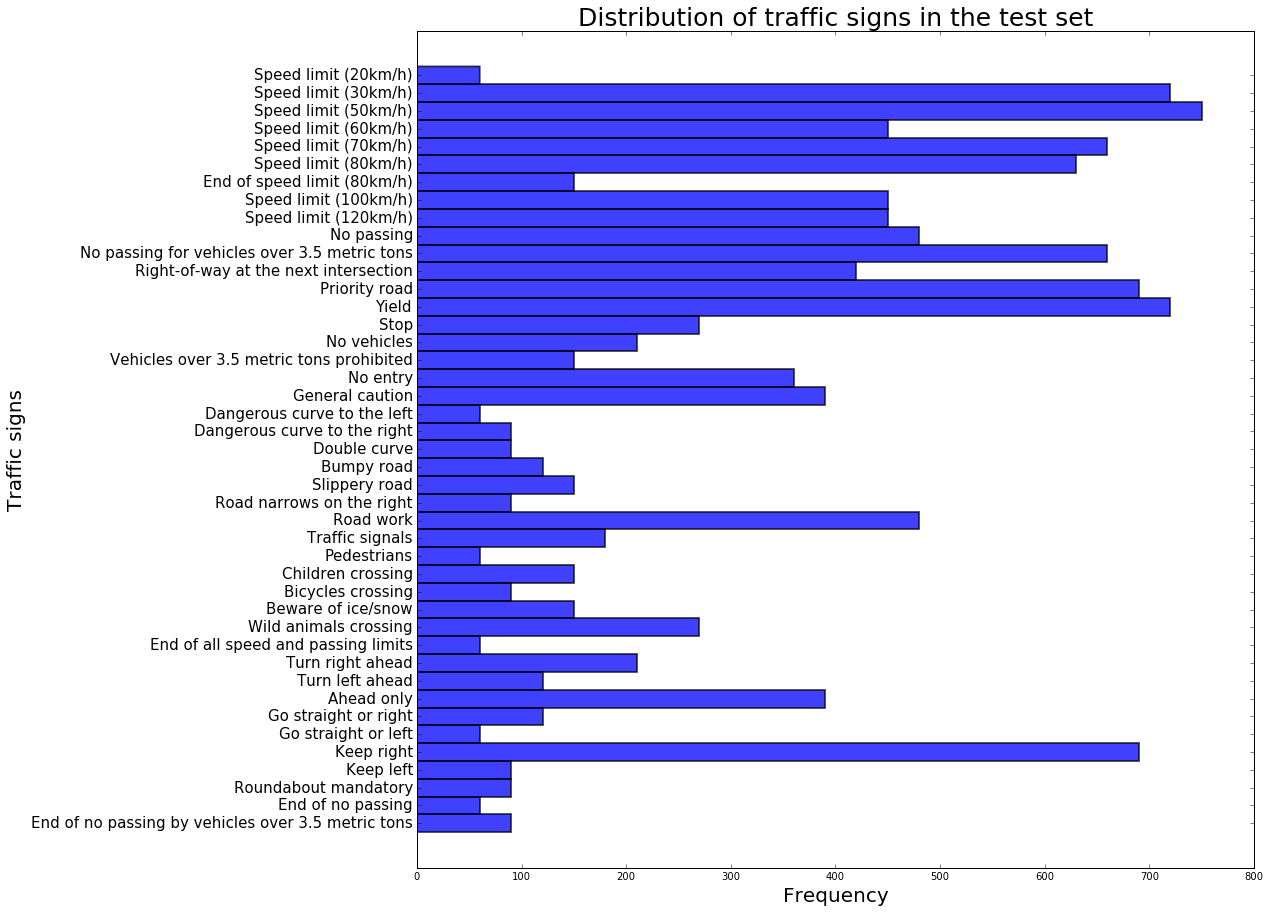

In [8]:
# plot a histogram of classes in the test set .

plt.figure(figsize=(15,15))

# divide the range of values into bins 

bins = np.arange(n_classes+1) - 0.5

# plot the histogram which mapps the bins into counts

plt.hist( y_test , bins , linewidth = 1.75 , alpha = 0.75 , orientation = 'horizontal')

plt.xlabel('Frequency' , fontsize=20 )
plt.ylabel('Traffic signs' , fontsize=20 )
plt.yticks( np.arange(n_classes) , sign_names , fontsize=15)
plt.ylim( np.min(bins) - 2 , np.max(bins) + 2 )
# reverse y-axis
plt.ylim(plt.ylim()[::-1])
plt.title('Distribution of traffic signs in the test set' , fontsize=25)
plt.savefig('./outputs/Distribution_of_traffic_signs_in_the_test_set.png')
plt.show()

## III. Plotting Traffic signs

In [0]:
def get_samples( data_set , samples_per_class=1 ) :
    '''
    This function returns samples of each class as specified by samples_per_class
    
    arguments:
    ----------
    dataset            -> input dataset in which searching happens
    samples_per_class  -> number of returned samples per class
    
    returns:
    ---------
    samples            -> list of samples
    '''
    samples = []
    for sign in range(n_classes) :
        for i in range(samples_per_class) :
            sample = X_train_orig[np.where( y_train == sign)][i]
            samples.append(sample)
    return samples

In [0]:
traffic_signs = get_samples(X_train_orig)

In [0]:
def plot_samples(samples , cols = 3 ) :
    '''
    This function plots samples of the dataset entitled with their labels/classes
    
    arguments:
    ----------
    samples      -> list of samples
    cols         -> number of columns of the subplots
    
    returns:
    --------
    nothing
    '''
    rows = n_classes//cols + 1
    fig , axes = plt.subplots(rows , cols , figsize=(15,40) , gridspec_kw = {'wspace':0.25 , 'hspace':0.25})
    axes = axes.reshape(-1)
    for i,sample in enumerate(samples) :
        axes[i].imshow(sample)
        axes[i].set_title(sign_names[i])
        axes[i].axis('off')
    fig.delaxes(axes[-1])
    fig.delaxes(axes[-2])
    fig.savefig('./outputs/traffic_signs.png' , dpi=100)

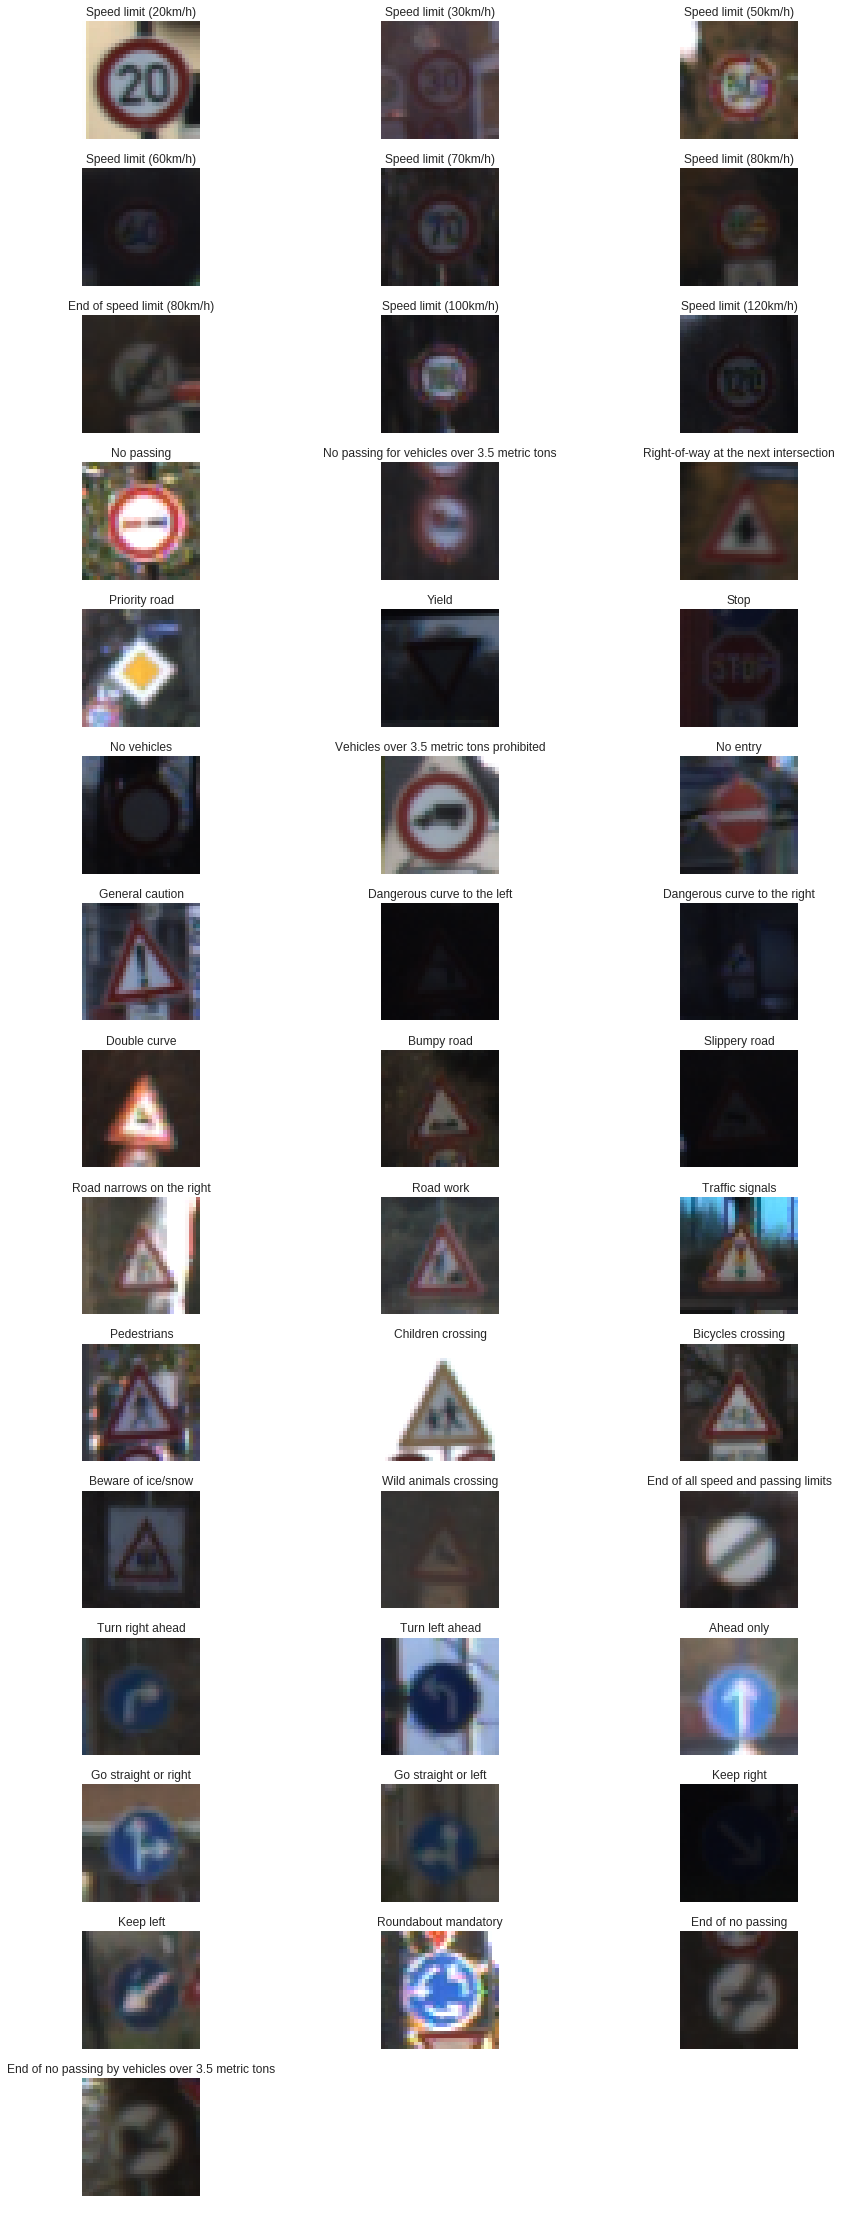

In [15]:
plot_samples(traffic_signs)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 implementation , you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data ( data augmentation ).

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

* ## Data pre-processing 

## - Data augmentation

In [9]:
import random
import cv2



# Random translations/shifts. (on x/y axis, [-2,2] pixels)

shifted_train = {'features': [], 'labels': []}
for image, label in zip( X_train_orig , y_train ):
    pixel = random.sample([-2, -1, 1, 2], 1)[0]
    M = np.array([ [1, 0, pixel] , [0, 1, 0] ] , dtype=np.float32 )
    shifted_train['features'].append(cv2.warpAffine(image, M , (image.shape[0], image.shape[1])))
    shifted_train['labels'].append(label)
    
    pixel = random.sample([-2, -1, 1, 2], 1)[0]
    TranslationMatrix = np.array([ [1, 0, 0] , [0, 1, pixel] ], dtype=np.float32 )
    shifted_train['features'].append(cv2.warpAffine(image, TranslationMatrix, (image.shape[0], image.shape[1])))
    shifted_train['labels'].append(label)
    
# Random rotations ([-20, 20] angles)

rotated_train = {'features': [], 'labels': []}
for image, label in zip( X_train_orig, y_train ):
    M = cv2.getRotationMatrix2D(center=(image.shape[1]/2, image.shape[0]/2), angle=random.uniform(-20, 20), scale=1)
    rotated_train['features'].append(cv2.warpAffine(image, M, (image.shape[0], image.shape[1])))
    rotated_train['labels'].append(label)
    
# put it all together 

augmented_train = {'features':
                    np.concatenate([train['features'], rotated_train['features'], shifted_train['features']]),
                   'labels':
                    np.concatenate([train['labels'], rotated_train['labels'], shifted_train['labels']])
                  }

assert (len(augmented_train['features'])==len(augmented_train['labels'])),"features and labels don't have th same length !."

In [17]:
print('Number of training examples before Data augmentation = ',len(train['features']))
print('Number of training examples after  Data augmentation = ',len(augmented_train['features']))

Number of training examples before Data augmentation =  34799
Number of training examples after  Data augmentation =  139196


Here is an example of a traffic sign before and after random rotations withing [ -20 , 20 ]  angles

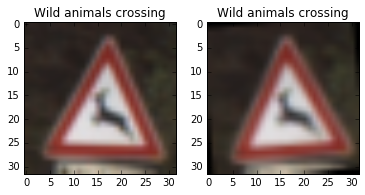

In [15]:
original = train['features'][500]
original_label = sign_names[ train['labels'][500] ]
rotated = rotated_train['features'][500]
rotated_label = sign_names[ rotated_train['labels'][500]]

ax1 = plt.subplot(1,2,1)
ax1.imshow(original)
ax1.set_title(original_label)

ax2 = plt.subplot(1,2,2)
ax2.imshow(rotated)
ax2.set_title(rotated_label)

plt.savefig('./outputs/rotating.png')

Here is an example of a traffic sign before and after random shifts

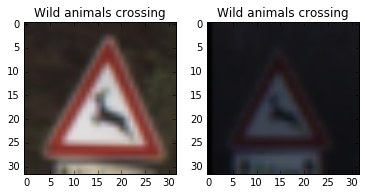

In [16]:
# select a random index
idx = 500

original = train['features'][idx]
original_label = sign_names[ train['labels'][idx] ]
shifted = shifted_train['features'][idx]
shifted_label = sign_names[ shifted_train['labels'][idx]]

ax1 = plt.subplot(1,2,1)
ax1.imshow(original)
ax1.set_title(original_label)

ax2 = plt.subplot(1,2,2)
ax2.imshow(shifted)
ax2.set_title(shifted_label)

plt.savefig('./outputs/shifting.png')

In [0]:
from sklearn.utils import shuffle

X_train_orig = augmented_train['features']
y_train = augmented_train['labels']

X_train_orig , y_train = shuffle(X_train_orig , y_train)
X_train_orig , y_train = shuffle(X_train_orig , y_train)
X_train_orig , y_train = shuffle(X_train_orig , y_train)

* ## Data normalization 

The dataset is preprocessed so that it is centered around zero and has equal variance .   
It's done by subtracting the mean from pixels values then dividing by the standard deviation  (data - mean)/std .   
This technique of data pre-processing is called `Standardization` . 
It helps the `CNN` converges faster in the training process

In [17]:
def normalize_data( dataset ) :
    normalized_data = ( dataset - np.mean(dataset) ) / np.std(dataset)
    return normalized_data

In [18]:
X_train = normalize_data(X_train_orig)
X_valid = normalize_data(X_valid_orig)
X_test  = normalize_data(X_test_orig)

In [21]:
print('training set   ->  mean = {:.2f} , std = {:0.2f} ' .format(np.abs(np.mean(X_train)) , np.std(X_train)) )
print('validation set ->  mean = {:.2f} , std = {:0.2f} ' .format(np.abs(np.mean(X_valid)) , np.std(X_valid)) )
print('test set       ->  mean = {:.2f} , std = {:0.2f} ' .format(np.abs(np.mean(X_test))  , np.std(X_test)) )

training set   ->  mean = 0.00 , std = 1.00 
validation set ->  mean = 0.00 , std = 1.00 
test set       ->  mean = 0.00 , std = 1.00 


Now , each set has a mean of zero and a standard deviation of 1.0

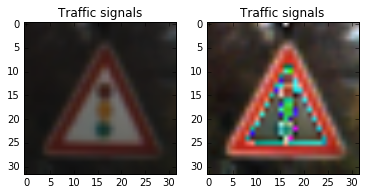

In [19]:
# select a randox index
idx = 200

original = X_train_orig[idx]
original_label = sign_names[ y_train[idx] ]
normalized = X_train[idx]
normalized_label = sign_names[ y_train[idx]]

ax1 = plt.subplot(1,2,1)
ax1.imshow(original)
ax1.set_title(original_label)

ax2 = plt.subplot(1,2,2)
ax2.imshow(normalized)
ax2.set_title(normalized_label)

plt.savefig('./outputs/normalization.png')

* ## Model Architecture :

In [0]:
# import libraries
import tensorflow as tf
from tensorflow.contrib.layers import flatten

###  - Define hyperparameters 

In [0]:
LEARNING_RATE = 0.001
BATCH_SIZE = 128
EPOCHS = 80

### - Build the computation graph

In [0]:
tf.reset_default_graph()

def LeNet(x) :   
  # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
      
    initializer = tf.contrib.layers.xavier_initializer()  

    weights = {
        'wc1' : tf.Variable( initializer( [5,5,3,8] )   , name='wc1')    , 
        'wc2' : tf.Variable( initializer( [5,5,8,16] )  , name='wc2')    ,
        'wc3' : tf.Variable( initializer( [3,3,16,32] ) , name='wc3')    ,
        'wc4' : tf.Variable( initializer( [3,3,32,64] ) , name='wc4')    ,
        'wc5' : tf.Variable( initializer( [3,3,64,100] ), name='wc5')    ,
        'wfc1' : tf.Variable(initializer( [1600,640]   ), name='wfc1')   ,
        'wfc2' : tf.Variable(initializer( [640,200 ]   ), name='wfc2')   ,
        'wout' : tf.Variable( initializer( [200,n_classes]  ) , name='wout') ,
    }

    biases = {
        'bc1' : tf.Variable( initializer( [8] )    , name='bc1')   ,
        'bc2' : tf.Variable( initializer( [16] )   , name='bc2')   ,
        'bc3' : tf.Variable( initializer( [32] )   , name='bc3')   ,
        'bc4' : tf.Variable( initializer( [64] )   , name='bc4')   ,
        'bc5' : tf.Variable( initializer( [100] )  , name='bc5')   ,
        'bfc1': tf.Variable( initializer( [640] )  , name='bfc1')   ,
        'bfc2': tf.Variable( initializer( [200] )  , name='bfc2')   ,
        'bout': tf.Variable( initializer( [n_classes] ) , name='bout')   ,

    }

    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x8.

    conv1 = tf.nn.conv2d( x , weights['wc1'] , strides=(1,1,1,1) , padding='SAME')

    conv1 = tf.nn.bias_add( conv1 , biases['bc1'] )

    # TODO: Activation.

    conv1 = tf.nn.relu(conv1)

    # TODO: Layer 2: Convolutional. Input = 32x32x8. Output = 32x32x16.

    conv2 = tf.nn.conv2d( conv1 , weights['wc2'] , strides=(1,1,1,1) , padding='SAME')

    conv2 = tf.nn.bias_add( conv2 , biases['bc2'] )

    # TODO: Activation.

    conv2 = tf.nn.relu(conv2)

    # TODO: dropout

    #conv2 = tf.nn.dropout(conv2 , keep_prob)

    # TODO: Pooling. Input = 32x32x16. Output = 16x16x16.

    pool1 = tf.nn.max_pool( conv2 , ksize=(1,2,2,1) , strides=(1,2,2,1) , padding='VALID')

    # TODO: Layer 3: Convolutional. Input= 16x16x16. Output = 16x16x32.

    conv3 = tf.nn.conv2d( pool1 , weights['wc3'] , strides=(1,1,1,1) , padding='SAME')

    conv3 = tf.nn.bias_add( conv3 , biases['bc3'] )

    # TODO: Activation.

    conv3 = tf.nn.relu(conv3)

    # TODO: Layer 4: Convolutional. Input = 16x16x32. Output = 16x16x64.

    conv4 = tf.nn.conv2d( conv3 , weights['wc4'] , strides=(1,1,1,1) , padding='SAME')

    conv4 = tf.nn.bias_add( conv4 , biases['bc4'] )

    # TODO: Activation.

    conv4 = tf.nn.relu(conv4)

    # TODO: dropout

    #conv4 = tf.nn.dropout( conv4 , keep_prob)

    # TODO: Pooling. Input = 16x16x64. Output = 8x8x64.

    pool2 = tf.nn.max_pool( conv4 , ksize=(1,2,2,1) , strides=(1,2,2,1) , padding='VALID')


    # TODO: Layer 5: Convolutional. Input = 8x8x64. Output = 8x8x100.

    conv5 = tf.nn.conv2d( pool2 , weights['wc5'] , strides=(1,1,1,1) , padding='SAME')

    conv5 = tf.nn.bias_add( conv5 , biases['bc5'] )

    # TODO: Activation.

    conv5 = tf.nn.relu(conv5)

    # TODO: dropout

    #conv5 = tf.nn.dropout( conv5 , keep_prob)

    # TODO: Pooling. Input = 8x8x100. Output = 4x4x100.

    pool3 = tf.nn.max_pool( conv5 , ksize=(1,2,2,1) , strides=(1,2,2,1) , padding='VALID')

    # TODO: Flatten. Input = 4x4x100. Output = 1600.

    fc0 = flatten( pool3 )

    # TODO: Layer 6: Fully Connected. Input = 1600. Output = 640.

    fc1 = tf.add( tf.matmul( fc0 , weights['wfc1'] ) , biases['bfc1'])

    # TODO: Activation.

    fc1 = tf.nn.relu(fc1)

    # TODO: Dropout

    fc1 = tf.nn.dropout( fc1 , keep_prob )

    # TODO: Layer 7: Fully Connected. Input = 640. Output = 200.

    fc2 = tf.add( tf.matmul( fc1  , weights['wfc2'] ) , biases['bfc2'])

    # TODO: Activation.

    fc2 = tf.nn.relu(fc2)

    # TODO: Dropout

    fc2 = tf.nn.dropout( fc2 , keep_prob )


    # TODO: Layer 8: Fully Connected. Input = 200. Output = n_classes.

    logits = tf.add( tf.matmul( fc2 , weights['wout']) , biases['bout'] , name='logits')


    return logits


### - Features and labels 

Insert placeholders in the graph for features and labels

In [0]:
features = tf.placeholder( tf.float32 , [None,32,32,3]  , name='features')
labels = tf.placeholder( tf.int32 , [None] , name='labels')
one_hot_labels = tf.one_hot( labels , n_classes)
keep_prob = tf.placeholder(tf.float32 , name='keep_prob')

## - Training cost and optimizer

Define the training cost and the optimizer

In [26]:
# training cost

logits = LeNet(features)
loss = tf.nn.softmax_cross_entropy_with_logits( logits = logits , labels = one_hot_labels)
cost = tf.reduce_mean(loss , name='cost')

# optimizer

optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)

# training operation

training_operation = optimizer.minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## - Model evaluation

The model must be evaluated in order to measure how well it's performing on the dataset.  
The model is evaluated by calculating its accuracy over the dataset.  
The accuracy is the number of correctly-classified examples divided by the number of all examples.

In [0]:
predict_operation = tf.argmax(logits , 1 , name='predict_op')
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
accuracy_operation = tf.reduce_mean( tf.cast( correct_prediction , tf.float32) , name='acc_op')

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    graph = tf.get_default_graph()
    sess = tf.get_default_session()
    features = graph.get_tensor_by_name('features:0')
    labels = graph.get_tensor_by_name('labels:0')
    keep_prob = graph.get_tensor_by_name('keep_prob:0')
    accuracy_operation = graph.get_tensor_by_name('acc_op:0')
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={ features : batch_x , labels : batch_y , keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
  
def compute_cost(X_data , y_data) :
    num_examples = len(X_data)
    num_batches = num_examples // BATCH_SIZE
    total_cost = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_cost = sess.run(cost , feed_dict = { features : batch_x , labels : batch_y , keep_prob : 1.0})
        total_cost += ( batch_cost / num_batches )
    return total_cost 

## - Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Trainig.....

Epoch 1 ...
Training accuracy = 0.9857 , Validation_accuracy = 0.9442

Epoch 2 ...
Training accuracy = 0.9955 , Validation_accuracy = 0.9533

Epoch 3 ...
Training accuracy = 0.9970 , Validation_accuracy = 0.9680

Epoch 4 ...
Training accuracy = 0.9953 , Validation_accuracy = 0.9528

Epoch 5 ...
Training accuracy = 0.9955 , Validation_accuracy = 0.9703

Epoch 6 ...
Training accuracy = 0.9977 , Validation_accuracy = 0.9707

Epoch 7 ...
Training accuracy = 0.9977 , Validation_accuracy = 0.9728

Epoch 8 ...
Training accuracy = 0.9993 , Validation_accuracy = 0.9726

Epoch 9 ...
Training accuracy = 0.9988 , Validation_accuracy = 0.9762

Epoch 10 ...
Training accuracy = 0.9974 , Validation_accuracy = 0.9698

Epoch 11 ...
Training accuracy = 0.9988 , Validation_accuracy = 0.9812

Epoch 12 ...
Training accuracy = 0.9992 , Validation_accuracy = 0.9773

Epoch 13 ...
Training accuracy = 0.9990 , Validation_accuracy = 0.9791

Epoch 14 ...
Training accuracy = 0.9991 , Validation_accura

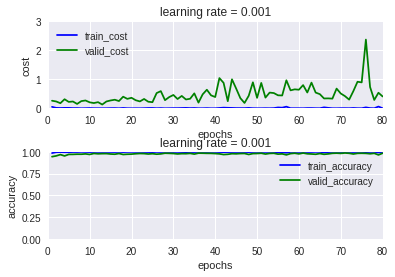

In [28]:
# initialize model parameters

init = tf.global_variables_initializer()

# create an instance of tf.train.Saver() class to save an restore tensorflow models

saver = tf.train.Saver()

# create a session to launch the graph and execute the computations

with tf.Session() as sess :
    
    sess.run(init)
    num_examples = len(X_train)
    num_batches = (num_examples//BATCH_SIZE) + 1
    
    costs = []        # to keep track of the costs
    accuracies = []   # to keep track of the accuracies
    
    
    print('Trainig.....\n')
    
    for epoch in range(EPOCHS):
    
        X_train , y_train = shuffle(X_train , y_train)
        
        for batch in range(num_batches):
            
            X_batch , y_batch = X_train[batch*BATCH_SIZE : (batch+1)*BATCH_SIZE] , y_train[batch*BATCH_SIZE : (batch+1)*BATCH_SIZE]
            
            sess.run(training_operation , feed_dict = { features : X_batch , labels : y_batch , keep_prob : 0.5 })
            
        # evaluate the metrics 'accuracy' and 'cost' 
        
        training_accuracy = evaluate(X_train , y_train)
        
        validation_accuracy = evaluate(X_valid , y_valid)
        
        training_cost = compute_cost(X_train , y_train)
        
        validation_cost = compute_cost(X_valid , y_valid)
        
        # keep track of the metrics
        
        costs.append( (training_cost , validation_cost) )
        
        accuracies.append( (training_accuracy , validation_accuracy) )
        
        print("Epoch {} ...".format(epoch+1))
        print("Training accuracy = {:0.4f} , Validation_accuracy = {:0.4f}".format(training_accuracy,validation_accuracy))
        print()
        
    print('\nTrainig finished.....\n')
    
    # save the model graph and parameters for future use
    
    saver.save(sess , './traffic_sign_classifier')
    
    print('model saved !')
    
    
    # plot learning curves

    ax1 = plt.subplot(2,1,1)
    ax1.plot(np.arange(EPOCHS)+1 , [x for x,_ in costs] , 'b' , label='train_cost')
    ax1.plot(np.arange(EPOCHS)+1 , [y for _,y in costs] , 'g' , label='valid_cost')
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('cost')
    ax1.set_xlim( [0,EPOCHS] )
    #ax1.set_ylim( [0, ax1.get_ylim()[1]] )
    ax1.set_ylim( [0,3.0] )
    ax1.set_title('learning rate = {:.3f}'.format(LEARNING_RATE))
    ax1.legend( fancybox=True , shadow=True)
  
    
    ax2 = plt.subplot(2,1,2)
    ax2.plot(np.arange(EPOCHS)+1 , [x for x,_ in accuracies ] , 'b' , label='train_accuracy')
    ax2.plot(np.arange(EPOCHS)+1 , [y for _,y in accuracies ] , 'g' , label='valid_accuracy')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('accuracy')
    ax2.set_xlim( [0,EPOCHS] )
    ax2.set_ylim( [0,1.0] )
    ax2.set_title('learning rate = {:.3f}'.format(LEARNING_RATE))
    ax2.legend( fancybox=True , shadow=True )
    
    plt.subplots_adjust( hspace = 0.5)
    

## - Test the model on test set

The test set is used ti assess how well the model will perform on real-world data 

In [29]:
# restore the pre-trained tensorflow model

with tf.Session() as sess :
    restorer = tf.train.import_meta_graph('./traffic_sign_classifier.meta')
    restorer.restore( sess , './traffic_sign_classifier' )
    print('model loaded !')
    
    test_accuracy = evaluate(X_test , y_test)
    print('Test accuracy = {:0.3f}'.format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier
model loaded !
Test accuracy = 0.973


The model achieved an accuracy of 97.3 % on the test set

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

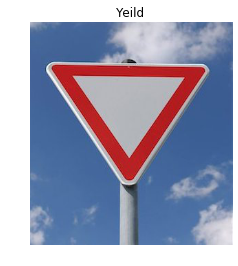

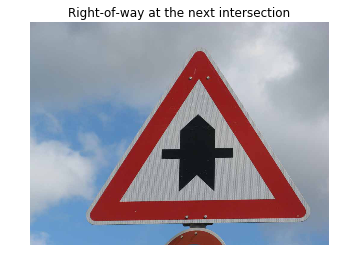

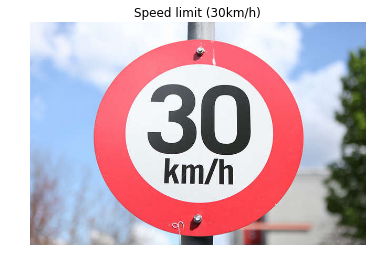

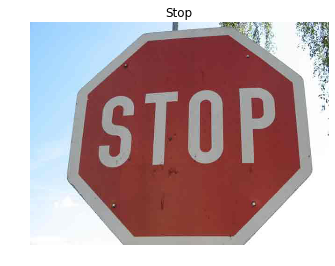

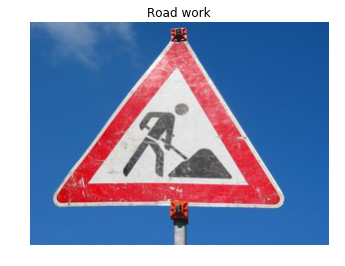

In [49]:
# import glob library 
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

images_path = glob.glob('./test_images/*.jpg')
sign_images = [mpimg.imread(path) for path in images_path]
sign_labels = ['Yeild' ,'Right-of-way at the next intersection' , 'Speed limit (30km/h)' , 'Stop' , 'Road work' ]

for i in range(len(sign_images)):
    plt.figure()
    plt.imshow(sign_images[i])
    plt.title(sign_labels[i])
    plt.axis('off')

### Predict the Sign Type for Each Image

In [50]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
def preprocess(images) :
    
    # cropping from center
    
    resized_images=[]
    
    for image in images :
        
        # width and height of image 
        
        width , height = image.shape[:2][::-1]
        
        # width and height of center as (x,y)
        
        center = ( width//2 , height//2 )
        
        # Length of sqaure
        
        L = np.min(( width , height ))//2
        
        # coordinates of cropping window -> ( (x1,y1) , (x2,y2) ) as (top_left corner , bottom_right corner)
        
        window = ( (center[0] - L  , center[1] - L ) , (center[0] + L , center[1] + L ) )
        
        # perform cropping
        
        cropped_image = image[window[0][1] : window[1][1] , window[0][0] : window[1][0] , :]
        
        
        # resizing 32x32x3
        
        resized_image = cv2.resize( cropped_image , (32,32) , interpolation=cv2.INTER_AREA)
        
        resized_images.append(resized_image)
        
    scaled_images = np.array(resized_images)
                        
    # normaization
        
    normalized_images = ( scaled_images - scaled_images.mean() ) / scaled_images.std()
        
    
    return normalized_images
        

In [51]:
new_images = preprocess(sign_images)

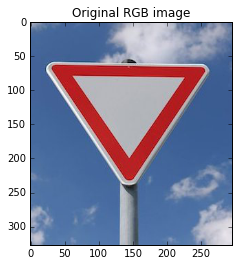

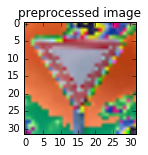

In [52]:
plt.figure()
plt.imshow(sign_images[0])
plt.title('Original RGB image')
plt.figure(figsize=(2,2))
plt.title('preprocessed image')
plt.imshow(new_images[0]) 

### Predict labels of new images

In [53]:
with tf.Session() as sess :
    restorer = tf.train.import_meta_graph('./traffic_sign_classifier.meta')
    restorer.restore( sess , './traffic_sign_classifier' )
    print('model loaded !')
    
    graph = tf.get_default_graph()
    logits = graph.get_tensor_by_name('logits:0')
    features = graph.get_tensor_by_name('features:0')
    keep_prob = graph.get_tensor_by_name('keep_prob:0')
    predict = tf.argmax( logits , 1 )
    predictions = sess.run( predict , feed_dict = {features : new_images , keep_prob : 1.0 })
    
data = { 'sign name' : [sign_names[class_id] for class_id in predictions] ,  
         'ground-truth label' : sign_labels ,'prediction/class id' : predictions }




df = pd.DataFrame(data)
df = df[['prediction/class id' ,'sign name' , 'ground-truth label']]
df.index.rename('image' , inplace=True)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
print()
print(df)






INFO:tensorflow:Restoring parameters from ./traffic_sign_classifier
model loaded !

       prediction/class id                              sign name                     ground-truth label
image                                                                                                   
0                       13                                  Yield                                  Yeild
1                       11  Right-of-way at the next intersection  Right-of-way at the next intersection
2                        1                   Speed limit (30km/h)                   Speed limit (30km/h)
3                       14                                   Stop                                   Stop
4                       25                              Road work                              Road work


### Analyze Performance

In [54]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
new_images_labels = np.array([13,11,1,14,25])

X_data = new_images
y_data = new_images_labels


with tf.Session() as sess :
    restorer = tf.train.import_meta_graph('traffic_sign_classifier.meta')
    restorer.restore( sess , 'traffic_sign_classifier' )
    print('model loaded !')
    
    graph = tf.get_default_graph()
    features = graph.get_tensor_by_name('features:0')
    labels = graph.get_tensor_by_name('labels:0')
    keep_prob = graph.get_tensor_by_name('keep_prob:0')
    accuracy_operation = graph.get_tensor_by_name('acc_op:0')
    accuracy = sess.run( accuracy_operation , feed_dict = { features : X_data , labels : y_data , keep_prob : 1.0 } )
    
print('Accuracy is {:0.3f}'.format(accuracy))


INFO:tensorflow:Restoring parameters from traffic_sign_classifier
model loaded !
Accuracy is 1.000


Since the model predicted 5 out of 5 signs correctly , it's 100 % accurate on these new images

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [55]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

with tf.Session() as sess :
    restorer = tf.train.import_meta_graph('traffic_sign_classifier.meta')
    restorer.restore( sess , 'traffic_sign_classifier' )
    print('model loaded !')
    
    graph = tf.get_default_graph()
    features = graph.get_tensor_by_name('features:0')
    keep_prob = graph.get_tensor_by_name('keep_prob:0')
    logits = graph.get_tensor_by_name('logits:0')
    class_id = tf.argmax(logits , 1)
    predictions = tf.nn.softmax(logits)
    top_predictions = tf.nn.top_k(predictions , k=5)
    top_k_predictions = sess.run( top_predictions , feed_dict = { features : X_data , keep_prob : 1.0 } )
    classes = sess.run( class_id , feed_dict = { features : X_data , keep_prob : 1.0 } )

print()
print(top_k_predictions)
print()

INFO:tensorflow:Restoring parameters from traffic_sign_classifier
model loaded !

TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.05420684e-15,   3.15204571e-16,
          1.31489583e-16,   9.63417118e-22],
       [  1.00000000e+00,   5.51383228e-23,   1.09719747e-28,
          1.91244166e-29,   7.67425542e-32],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[13,  0,  1,  2,  3],
       [11,  0,  1,  2,  3],
       [ 1,  2,  4,  5,  3],
       [14,  1, 13,  5,  9],
       [25,  0,  1,  2,  3]], dtype=int32))



## Visualization of top 5 softmax probabilities

In [56]:
softmax_probabilities = top_k_predictions[0]
classes = top_k_predictions[1]
print(classes.shape)
print(softmax_probabilities.shape)

(5, 5)
(5, 5)


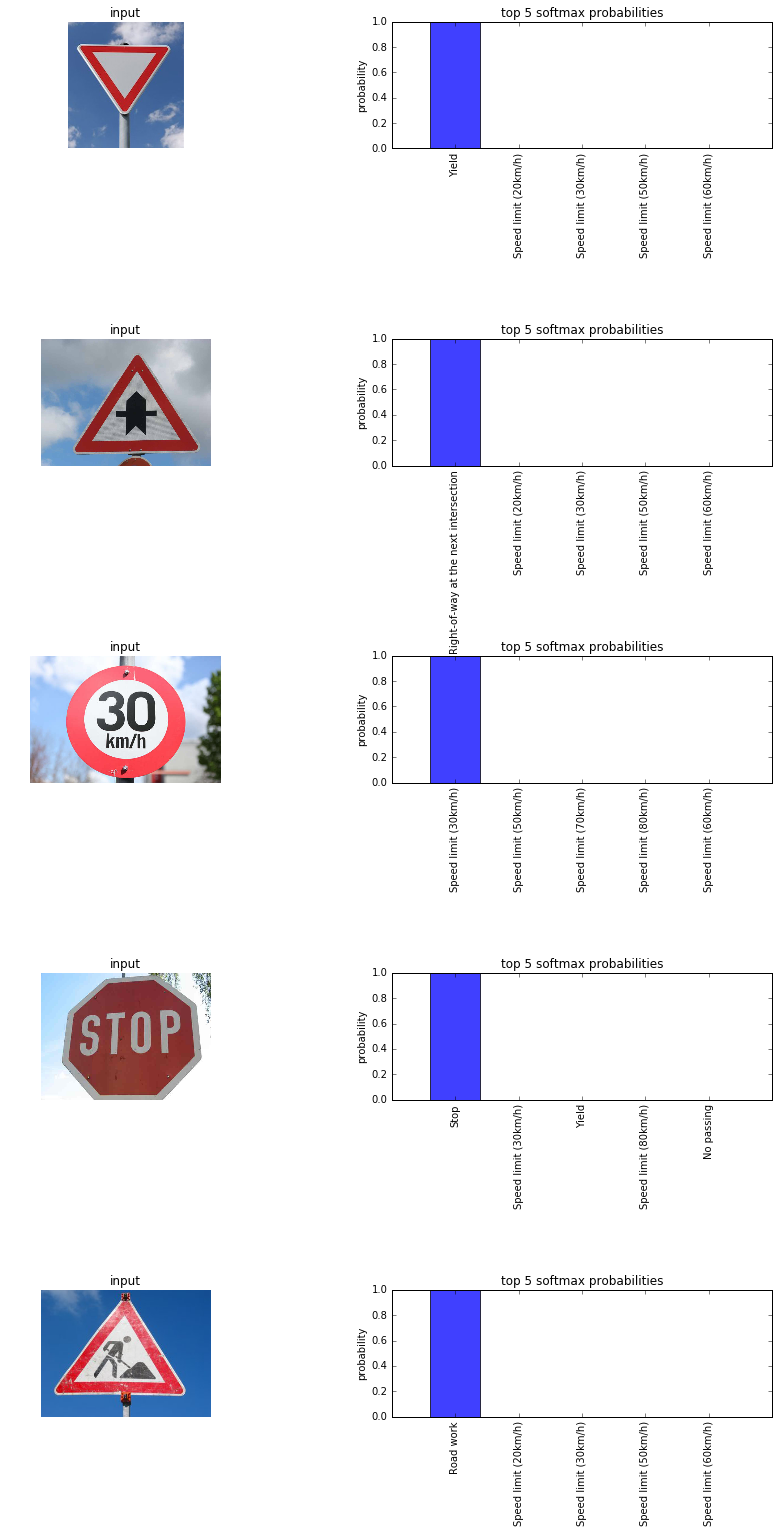

In [58]:
rows = len(sign_images)
cols = 2

f , axes = plt.subplots( rows , cols , figsize=(15,25))

for i in range(rows) :
    for j in range(cols):
        if j == 0 :
            axes[i,j].imshow(sign_images[i])
            axes[i,j].set_title('input')
            axes[i,j].axis('off')
            continue
        axes[i,j].bar( np.arange(len(classes[i])) , softmax_probabilities[i] , align='center' , alpha=0.75 )
        axes[i,j].set_title('top 5 softmax probabilities')
        #axes[i,j].set_xlabel('sign type')
        axes[i,j].set_ylabel('probability')
        axes[i,j].set_xticks(np.arange(len(classes[i])) )
        axes[i,j].set_xticklabels([sign_names[class_id] for class_id in classes[i]] , rotation='vertical')
f.subplots_adjust( hspace=1.5)  
f.savefig('./outputs/softmax_probabilitis.png')

The model demonstrated high-level of certainity on these real-world traffic sign images ! 

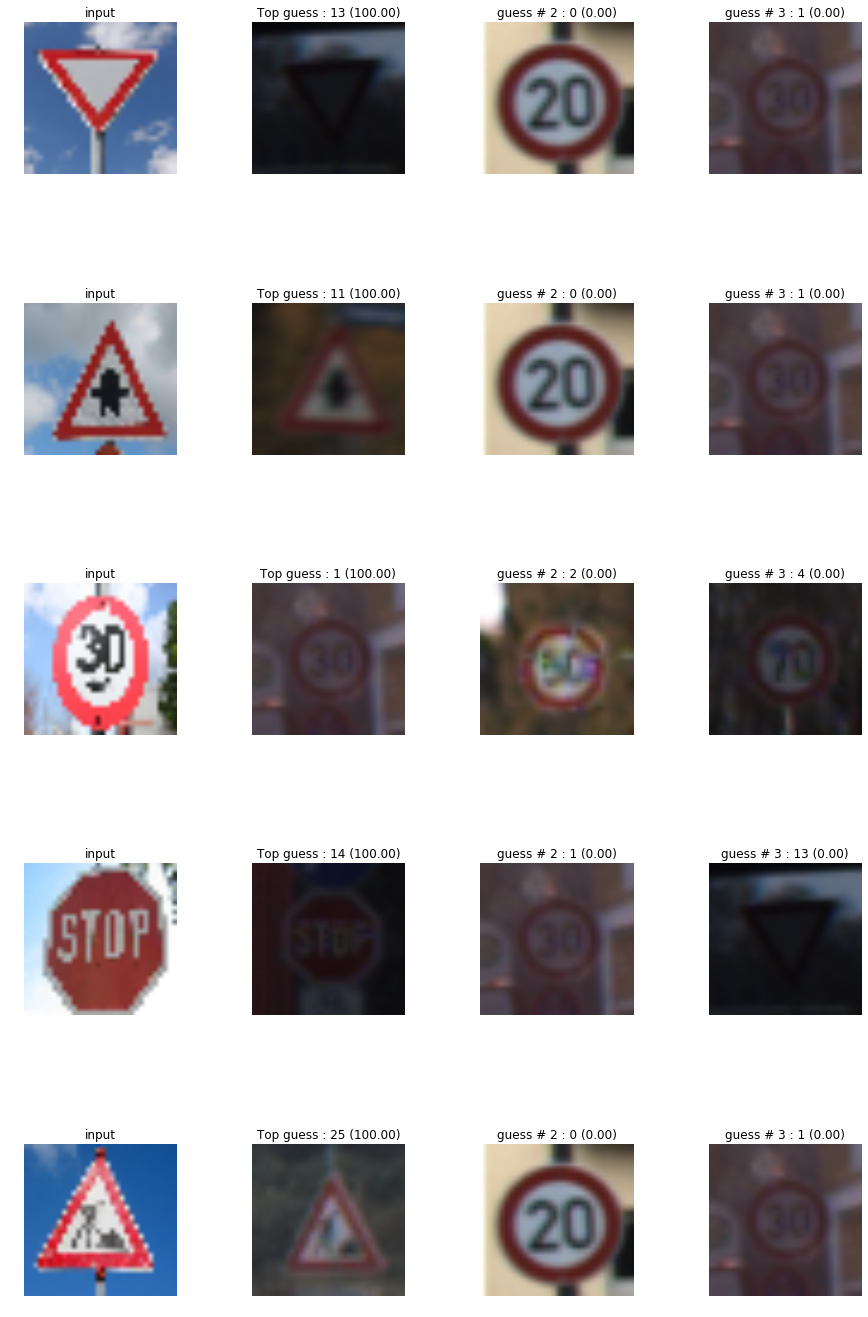

In [59]:
import cv2
rows = len(sign_images)
cols = 4

f , axes = plt.subplots( rows , cols , figsize=(15,25))

for i in range(rows) :
    for j in range(cols):
        if j == 0 :
            axes[i,j].imshow(cv2.resize(sign_images[i] , (32,32)))
            axes[i,j].set_title('input')
            axes[i,j].axis('off')
            continue
        class_id = classes[i,j-1]
        softmax_probability = softmax_probabilities[i,j-1]
        sample = X_train_orig[np.where( y_train == class_id)][0]
        if j==1 :
            title = 'Top guess : '
        else :
            title = 'guess # '+str(j)+' : '
        
        axes[i,j].imshow(sample )
        axes[i,j].set_title(title+str(class_id)+' ({:0.2f})'.format(softmax_probability*100))
        axes[i,j].axis('off')
f.subplots_adjust( hspace=0.025 , wspace=0.5)   
f.savefig('./outputs/top_guesses.png')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [0]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")